In [1]:
import h5py
import numpy as np
import glob
import matplotlib.pyplot as plt
import sys

sys.path.append("../lib/")
from figparams import *
from utils import *

plt.rcParams.update(rc_params)

In [2]:
# Define the packs to process
packs = range(1, 25)  # 1 to 24

# Dictionary to store sample counts for each pack
sample_counts = {
    "pack": [],
    "nessai_whittle": [],
    "nessai_gamma_stat": [],
    "nessai_gamma": [],
    "hmc_gamma": [],
    "hmc_gamma_stat": [],
}

colors = get_colormap_colors(24, "plasma")


# File numbers
file_numbers = np.array(
    [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
    ]
)

# HMC Gamma Cyclo (hgc)
cput_hgc = np.array(
    [
        1559.814,
        2874.963,
        2395.214,
        2829.769,
        4537.0,
        6094.0,
        5835.0,
        6243.0,
        4959.0,
        5349.0,
        5818.0,
        8778.0,
        7787.0,
        8803.0,
        15576.0,
        9440.0,
        9160.0,
        10941.0,
        12303.0,
        12576.0,
        14528.0,
        16003.0,
        15271.0,
        18391.0,
    ]
)
mem_hgc = np.array(
    [
        1226.22,
        1696.35,
        2290.64,
        3066.37,
        4161.72,
        5201.15,
        6503.33,
        8027.83,
        9543.06,
        11353.13,
        13352.89,
        15588.32,
        17824.95,
        20272.22,
        22880.60,
        25641.73,
        28712.13,
        31936.29,
        35471.60,
        38980.19,
        42762.58,
        46666.19,
        50711.39,
        55331.28,
    ]
)

# HMC Gamma Stat (hgs)
cput_hgs = np.array(
    [
        327.198,
        431.83,
        668.649,
        801.406,
        1039.212,
        1229.871,
        1472.63,
        1797.933,
        2019.85,
        2255.828,
        3795.0,
        4023.0,
        2971.435,
        3270.427,
        3387.357,
        3773.0,
        3637.0,
        4355.0,
        4571.0,
        4588.0,
        5383.0,
        5441.0,
        7376.0,
        5503.0,
    ]
)
mem_hgs = np.array(
    [
        806.92,
        905.75,
        871.02,
        919.66,
        1023.14,
        981.33,
        1085.22,
        1112.03,
        1140.36,
        1169.28,
        1198.2,
        1259.13,
        1271.99,
        1203.38,
        1256.12,
        1354.47,
        1385.85,
        1415.96,
        1463.39,
        1489.07,
        1528.96,
        1559.2,
        1585.15,
        1622.46,
    ]
)

# Nessai Gamma Cyclo (ngc)
cput_ngc = np.array(
    [
        640.401,
        900.867,
        1736.541,
        1914.446,
        2137.977,
        3009.851,
        2856.32,
        3512.943,
        3600.0,
        4464.0,
        4415.0,
        4671.0,
        5311.0,
        5465.0,
        6140.0,
        6594.0,
        7497.0,
        7637.0,
        9069.0,
        8045.0,
        8557.0,
        10566.0,
        9719.0,
        9828.0,
    ]
)
mem_ngc = np.array(
    [
        959.79,
        1031.72,
        1102.37,
        1122.33,
        1082.41,
        1204.91,
        1037.35,
        1203.63,
        1079.65,
        1245.41,
        1230.44,
        1244.37,
        1428.11,
        1049.58,
        1181.62,
        1107.15,
        1168.89,
        1156.16,
        1276.08,
        1101.3,
        1150.15,
        1492.48,
        1966.19,
        1135.15,
    ]
)

# Nessai Gamma Stat (ngs)
cput_ngs = np.array(
    [
        215.015,
        306.423,
        388.221,
        749.639,
        718.147,
        879.36,
        1134.111,
        1160.647,
        1183.679,
        1476.889,
        1427.978,
        1474.592,
        1596.395,
        1712.222,
        1840.106,
        1968.203,
        2228.184,
        2263.794,
        2337.567,
        2668.698,
        2615.495,
        2313.069,
        3068.281,
        2919.168,
    ]
)
mem_ngs = np.array(
    [
        934.0,
        1013.61,
        926.11,
        1000.13,
        946.45,
        1007.2,
        1024.15,
        965.14,
        1031.23,
        985.37,
        1043.91,
        1016.31,
        1223.4,
        985.95,
        1005.63,
        990.57,
        946.79,
        985.62,
        992.31,
        1036.47,
        1293.03,
        996.89,
        1020.47,
        995.61,
    ]
)

# Nessai Whittle Cyclo (nwc)
cput_nwc = np.array(
    [
        6878.0,
        11916.0,
        20423.0,
        26533.0,
        26741.0,
        38225.0,
        33057.0,
        45524.0,
        50338.0,
        48847.0,
        67034.0,
        63943.0,
        64388.0,
        73973.0,
        72562.0,
        79310.0,
        97094.0,
        108760.0,
        109030.0,
        116023.0,
        133440.0,
        133772.0,
        116844.0,
        169468.0,
    ]
)
mem_nwc = np.array(
    [
        1072.59,
        1068.84,
        2240.76,
        2134.81,
        1203.85,
        1208.92,
        1097.93,
        1201.96,
        1225.68,
        1236.98,
        1590.73,
        1867.22,
        1649.68,
        1762.57,
        1386.42,
        2175.71,
        2380.77,
        2431.06,
        2350.47,
        2430.24,
        2495.6,
        2499.42,
        2522.64,
        2620.52,
    ]
)

In [3]:
label_plot = [
    "$\\alpha$",
    "$A$",
    "$f_{\\mathrm{knee}}$",
    "$f_{1}$",
    "$f_{2}$",
    "$\\sin \\beta$",
    "$\\lambda$",
    "$\\sin \\psi$",
    "$\\sigma_1^2$",
    "$\\sigma_2^2$",
]
label = ["alpha", "amp", "fknee", "fr1", "fr2", "lat", "long", "psi", "s1", "s2"]
label_stat = ["alpha", "amp", "fknee", "fr1", "fr2"]

#################################################################################
# Loop through all packs
for pack_num in packs:
    print(f"\n{'=' * 60}")
    print(f"Processing pack {pack_num}...")
    print(f"{'=' * 60}")

    sample_counts["pack"].append(pack_num)

    try:
        #################################################################################
        # 1. Load Nessai Whittle samples
        nessai_whittle_path = f"../data/first_year_twoweeks/pack_{pack_num}/nessai/Whittle/cyclo/result.hdf5"
        try:
            with h5py.File(nessai_whittle_path, "r") as f:
                posterior = f["posterior_samples"][:]
                samples_nessai_whittle = np.vstack(
                    [posterior[name] for name in label_stat]
                ).T
                sample_counts["nessai_whittle"].append(len(samples_nessai_whittle))
                print(f"  Nessai Whittle: {len(samples_nessai_whittle)} samples")
        except Exception as e:
            print(f"  Nessai Gamma Stat: ERROR - {e}")
            sample_counts["nessai_whittle"].append(0)

        #################################################################################
        # 1. Load Nessai Whittle samples
        nessai_whittle_path = (
            f"../data/first_year_twoweeks/pack_{pack_num}/nessai/Gamma/stat/result.hdf5"
        )
        try:
            with h5py.File(nessai_whittle_path, "r") as f:
                posterior = f["posterior_samples"][:]
                samples_nessai_whittle = np.vstack(
                    [posterior[name] for name in label_stat]
                ).T
                sample_counts["nessai_gamma_stat"].append(len(samples_nessai_whittle))
                print(f"  Nessai Gamma Stat: {len(samples_nessai_whittle)} samples")
        except Exception as e:
            print(f"  Nessai Gamma Stat: ERROR - {e}")
            sample_counts["nessai_gamma_stat"].append(0)

        #################################################################################
        # 2. Load Nessai Gamma samples
        nessai_gamma_path = f"../data/first_year_twoweeks/pack_{pack_num}/nessai/Gamma/cyclo/result.hdf5"
        # check if file exists

        try:
            with h5py.File(nessai_gamma_path, "r") as g:
                posterior = g["posterior_samples"][:]
                samples_nessai_gamma = np.vstack([posterior[name] for name in label]).T
                sample_counts["nessai_gamma"].append(len(samples_nessai_gamma))
                print(f"  Nessai Gamma: {len(samples_nessai_gamma)} samples")
        except Exception as e:
            print(f"  Nessai Gamma: ERROR - {e}")
            sample_counts["nessai_gamma"].append(0)

        #################################################################################
        # 3. Load HMC Gamma samples
        folder = f"../data/first_year_twoweeks/pack_{pack_num}/hmc/Gamma/cyclo/temp_16/"
        files = sorted(
            glob.glob(
                folder + f"thinned_chain_*_pack_{pack_num}_Gamma_cyclo_temp_16.csv"
            )
        )

        try:
            posterior = []
            for file in files:
                result = np.genfromtxt(file, delimiter=",", names=True)
                parameter_names_old = list(result.dtype.names)
                parameter_names = [n.split("_")[-1] for n in parameter_names_old]
                chain_length = len(result[parameter_names_old[0]])
                dtype_list = [(j, "f8") for j in parameter_names]
                post = np.zeros(chain_length, dtype=dtype_list)
                for j in range(len(parameter_names)):
                    post[parameter_names[j]] = result[parameter_names_old[j]]
                posterior.append(post)

            if len(posterior) > 0:
                posterior = np.concatenate(posterior)
                samples_hmc_gamma = np.vstack([posterior[name] for name in label]).T
                sample_counts["hmc_gamma"].append(len(samples_hmc_gamma))
                print(
                    f"  HMC Gamma: {len(samples_hmc_gamma)} samples from {len(files)} files"
                )
            else:
                sample_counts["hmc_gamma"].append(0)
                print(f"  HMC Gamma: No files found")
        except Exception as e:
            print(f"  HMC Gamma: ERROR - {e}")
            sample_counts["hmc_gamma"].append(0)

        #################################################################################
        # 4. Load HMC Whittle samples
        folder = f"../data/first_year_twoweeks/pack_{pack_num}/hmc/Gamma/stat/temp_16/"
        files = sorted(
            glob.glob(
                folder + f"thinned_chain_*_pack_{pack_num}_Gamma_stat_temp_16.csv"
            )
        )

        try:
            posterior = []
            for file in files:
                result = np.genfromtxt(file, delimiter=",", names=True)
                parameter_names_old = list(result.dtype.names)
                parameter_names = [n.split("_")[-1] for n in parameter_names_old]
                chain_length = len(result[parameter_names_old[0]])
                dtype_list = [(j, "f8") for j in parameter_names]
                post = np.zeros(chain_length, dtype=dtype_list)
                for j in range(len(parameter_names)):
                    post[parameter_names[j]] = result[parameter_names_old[j]]
                posterior.append(post)

            if len(posterior) > 0:
                posterior = np.concatenate(posterior)
                samples_hmc_whittle = np.vstack(
                    [posterior[name] for name in label_stat]
                ).T
                sample_counts["hmc_gamma_stat"].append(len(samples_hmc_whittle))
                print(
                    f"  HMC Gamma Stat: {len(samples_hmc_whittle)} samples from {len(files)} files"
                )
            else:
                sample_counts["hmc_gamma_stat"].append(0)
                print(f"  HMC Gamma Stat: No files found")
        except Exception as e:
            print(f"  HMC Gamma: ERROR - {e}")
            sample_counts["hmc_gamma_stat"].append(0)

    except Exception as e:
        print(f"  Overall ERROR for pack {pack_num}: {e}")
        # Fill with zeros if pack completely fails
        for key in [
            "nessai_whittle",
            "nessai_gamma_stat",
            "nessai_gamma",
            "hmc_gamma",
            "hmc_gamma_stat",
        ]:
            if len(sample_counts[key]) < pack_num:
                sample_counts[key].append(0)


sam_hgc = np.array(sample_counts["hmc_gamma"])
sam_hgs = np.array(sample_counts["hmc_gamma_stat"])
sam_ngc = np.array(sample_counts["nessai_gamma"])
sam_ngs = np.array(sample_counts["nessai_gamma_stat"])
sam_nwc = np.array(sample_counts["nessai_whittle"])


Processing pack 1...
  Nessai Whittle: 10076 samples
  Nessai Gamma Stat: 9719 samples
  Nessai Gamma: 10105 samples
  HMC Gamma: 30000 samples from 4 files
  HMC Gamma Stat: 35000 samples from 4 files

Processing pack 2...
  Nessai Whittle: 11351 samples
  Nessai Gamma Stat: 9687 samples
  Nessai Gamma: 11537 samples
  HMC Gamma: 23036 samples from 4 files
  HMC Gamma Stat: 37500 samples from 4 files

Processing pack 3...
  Nessai Whittle: 11570 samples
  Nessai Gamma Stat: 9585 samples
  Nessai Gamma: 11670 samples
  HMC Gamma: 25500 samples from 4 files
  HMC Gamma Stat: 35000 samples from 4 files

Processing pack 4...
  Nessai Whittle: 11689 samples
  Nessai Gamma Stat: 9550 samples
  Nessai Gamma: 11169 samples
  HMC Gamma: 32500 samples from 4 files
  HMC Gamma Stat: 37500 samples from 4 files

Processing pack 5...
  Nessai Whittle: 11561 samples
  Nessai Gamma Stat: 9535 samples
  Nessai Gamma: 11551 samples
  HMC Gamma: 25500 samples from 4 files
  HMC Gamma Stat: 30000 sample

In [4]:
# Plot CPU time comparison
year = 31536000
ratio_hgc = cput_hgc / sam_hgc
ratio_hgs = cput_hgs / sam_hgs
ratio_ngc = cput_ngc / sam_ngc
ratio_ngs = cput_ngs / sam_ngs
ratio_nwc = cput_nwc / sam_nwc

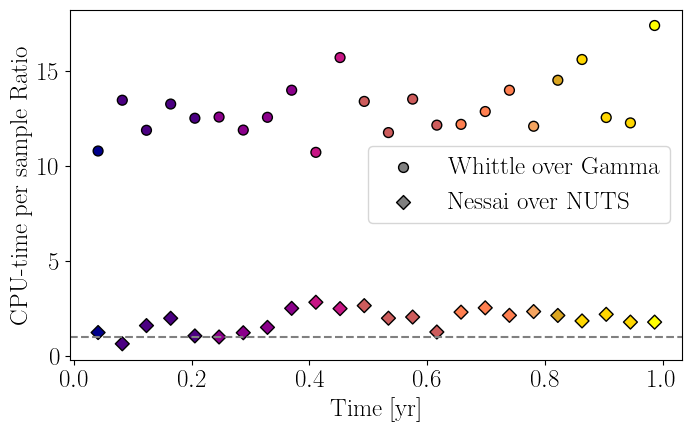

In [5]:
fig = plt.figure(figsize=rect_size, layout="constrained")
x = file_numbers * 15 * 86400 / year  # Convert to years
plt.scatter(x, ratio_nwc / ratio_ngc, marker="o", c=colors, s=50, edgecolors="black")
plt.scatter(x, ratio_ngc / ratio_hgc, marker="D", c=colors, s=50, edgecolors="black")

legend = ["Whittle over Gamma", "Nessai over NUTS"]
for i in range(len(legend)):
    plt.scatter(
        [],
        [],
        marker="o" if i == 0 else "D",
        c="gray",
        s=50,
        edgecolors="black",
        label=legend[i],
    )

plt.axhline(1, color="gray", linestyle="--")
plt.xlabel("Time [yr]")
plt.ylabel("CPU-time per sample Ratio")
plt.legend(loc="center right")

plt.savefig("../plots/Figure5.pdf")